In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Hyperparameters

In [2]:
window = 30
#thresholds = np.arange(6, 145, 6)
thresholds = [580, 513, 186, 178, 113, 106,  84,  82,  81,  77,  68,  67
, 64,  63,  62,  32,  29,  24,  23,  22,  20,  19,  16,  15,  13,  10,
 9, 8, 7, 5, 4, 3, 2, 1, 0]


# Preprocessing 

In [3]:
df = pd.read_excel('data.xlsx', engine='openpyxl')
df.head(10)

,ctx,codice_dm,lista_id,pers_sesso,pers_eta_ingresso_in_lista,diagnosi,diagnosi_specifica,eltr,lista_ingresso_data,tot_tx_organo,...,donatore_HBeAg,donatore_HBeAb,donatore_antiCoreTot,donatore_hbv_dna,donatore_hcv_rna,donatore_steatosiMacro,donatore_biopsiaEpatica,donatore_biopsiaRenale,donatore_livelloRischioPreLT,donatore_variazioneLivello
0,BOLOGNA,12898,20412,M,54,Altra epatopatia,NaN,NaN,2004-03-10,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BOLOGNA,12908,20422,M,64,Cirrosi postnecrotica da HCV,NaN,NaN,2003-12-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BOLOGNA,12909,20423,M,56,Cirrosi criptogenetica o idiopatica,NaN,D11 : Cirrhosis-Cryptogenic (unknown) cirrhosis,2002-07-18,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOLOGNA,12913,20428,M,51,Cirrosi di Laennec (post-alcolica),NaN,NaN,2003-06-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BOLOGNA,12935,20450,M,43,Cirrosi postnecrotica da HCV,NaN,NaN,2004-01-08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BOLOGNA,12937,20452,F,63,Epatocarcinoma associato a cirrosi,NaN,NaN,2003-12-29,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BOLOGNA,12939,20454,F,55,Cirrosi biliare primitiva,NaN,NaN,2003-10-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BOLOGNA,12958,20473,M,63,Cirrosi postnecrotica da HCV,NaN,NaN,2003-07-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,BOLOGNA,12961,20476,M,62,Cirrosi postnecrotica da HBV HbsAg positiva,NaN,NaN,2003-07-24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BOLOGNA,12964,20479,M,43,Cirrosi postnecrotica da HCV,NaN,NaN,2004-02-23,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove every attribute with 20% of missing values

In [4]:
missing_percent = {}
for column in df.columns:
    missing_percent[column] = df[column].isna().sum() / len(df)
for column in sorted(missing_percent, key=missing_percent.get, reverse=True):
    print('{}: {:.3f}'.format(column, missing_percent[column]))

Na: 1.000
fega_note: 0.999
donatore_diabete_insulinodipendente_desc: 0.999
donatore_bassaportata3_PAmin: 0.998
donatore_bassaportata3_data: 0.997
donatore_bassaportata3_ora: 0.997
donatore_bassaportata3_durata: 0.997
donatore_bassaportata3_PAmax: 0.997
donatore_bassaportata3_trattamento: 0.997
ISO2_tipo_super_urgenza: 0.997
donatore_bassaportata2_PAmin: 0.995
donatore_bassaportata2_PAmax: 0.993
donatore_bassaportata2_durata: 0.991
donatore_bassaportata2_ora: 0.990
donatore_bassaportata2_trattamento: 0.990
scheda48h_tipo_tx_effettivo_combinato: 0.989
donatore_biopsiaRenale: 0.989
donatore_bassaportata2_data: 0.988
donatore_note: 0.980
categoria_HCC: 0.977
diagnosi_specifica: 0.974
donatore_diabete_desc: 0.974
donatore_dislipidemie_desc: 0.970
trombosi_portale_note: 0.969
ISO2_Ecc. MELD: 0.969
donatore_bassaportata1_PAmin: 0.958
donatore_variazioneLivello: 0.954
tipo_combinato: 0.944
ric_eccezione_MELD_PELD: 0.944
donatore_bassaportata1_PAmax: 0.939
donatore_HBeAg: 0.939
donatore_bassapo

In [5]:
date_columns = ['data_trapianto', 'data_decesso', 'lista_uscita_data', 'lista_ingresso_data']
drop_list = [k for k, v in missing_percent.items() if v >= 0.198 and k not in date_columns] + \
            ['diagnosi', 'ctx', 'codice_dm', 'lista_id', 'causa_uscita', 'data_ultimo_agg_followup', 'data_UNOS']
print(drop_list)
df = df.drop(drop_list, axis=1)

['diagnosi_specifica', 'eltr', 'tot_tx_organo', 'tx_fegato_corrente', 'tipo_combinato', 'ric_DELTA', 'ric_HCV_RNA', 'ric_eccezione_MELD_PELD', 'Na', 'MELD_in_ingresso', 'MELD_in_uscita', 'chirurgia_addom_note', 'trombosi_portale_note', 'TIPS', 'ric_diabete', 'categoria_HCC', 'HCC_esordio', 'HCC_noduli', 'HCC_downstaging', 'HCC_diam_max', 'HCC_diam_totale', 'HCC_stadio_TNM', 'HCC_resezione', 'MELD_na', 'MELD_HCC', 'AFP', 'dialisi_ultimi_15gg', 'tx_effettivo_data', 'scheda48h_tx_effettivo_combinato', 'scheda48h_tipo_tx_effettivo_combinato', 'fega_note', 'CHILD', 'ISO2_tipo_super_urgenza', 'ISO2_Ecc. MELD', 'ISO2_valid_score', 'ISO2_valid_increment', 'ISO2_valid_giorni', 'ISO2_valid_mesi', 'ISO2_valid_anzianita', 'ISO2_allocazione', 'ric_ospedalizzazione_al_tx', 'organo_trapiantato', 'ischemia_fredda', 'ric_ripresa_funzionale', 'rigetto', 'ultimo_stato_tx', 'data_ultimo_agg_followup', 'codice_sit_donazione', 'donazione_ospedale', 'donazione_sede', 'donatore_eta', 'donatore_sesso', 'trap_d

### Encoding Categorical Attributes

In [6]:
categories = ['pers_sesso', 'ric_HCV', 'HCC', 'trombosi_portale', 'ric_HBsAg',
              'UNOS', 'ric_HIV', 'chirurgia_addom', 'iscriz_tx_comb', 'ISO2_super_urgenza']

In [7]:
df = pd.get_dummies(df, columns=categories, drop_first=True)

### Define Censored Data and Compute ToS

In [8]:
df['deceased'] = np.zeros(len(df)) 
df['transplanted'] = np.zeros(len(df))
df['censored'] = np.zeros(len(df))

In [9]:
for index, row in df.iterrows():
    if not row['data_trapianto'] is pd.NaT:
        # check if patient is transplanted
        df.at[index, 'transplanted'] = 1
    elif not row['data_decesso'] is pd.NaT:
        # check if patient is deceased 
        df.at[index, 'deceased'] = 1
    elif row['data_decesso'] is pd.NaT:
        # patients data are censored if we have a date signifing the exit from the waiting list, but not a 
        # confirmend death date. Thus, only deceased people are uncensored. 
        df.at[index, 'data_decesso'] = row['lista_uscita_data']
        
# compute Time of Survival as number of day/months/weeks spent on the list before exiting it or dying 
df['ToS'] = (df['data_decesso'] - df['lista_ingresso_data']).dt.days / window

In [10]:
df_n_trans = df[df['transplanted'] == 0]
df_n_trans = df_n_trans.drop(date_columns + ['transplanted'], axis=1)
df_n_trans = df_n_trans.dropna()

In [11]:
censored_count = []
for th in thresholds:
    for index, row in df_n_trans.iterrows():
        if th > row['ToS'] and row['deceased'] == 1:
            df_n_trans.at[index, 'censored'] = 0
        else:
            df_n_trans.at[index, 'censored'] = 1
    censored_count.append(df_n_trans['censored'].sum())

<module 'matplotlib.pyplot' from '/home/fbaldo/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

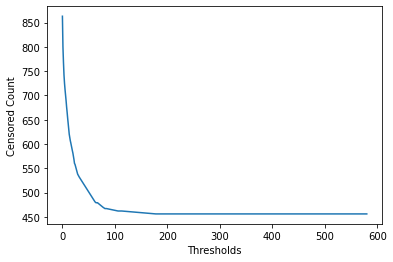

In [12]:
plt.plot(thresholds, censored_count)
plt.xlabel('Thresholds')
plt.ylabel('Censored Count')
plt

# Building Model

In [13]:
df_n_trans = df[df['transplanted'] == 0]
#df_n_trans = df_n_trans[df_n_trans['deceased'] == 1]
df_n_trans = df_n_trans.drop(date_columns + ['transplanted'], axis=1)
df_n_trans = df_n_trans.dropna()
df_n_trans.head(10)

,pers_eta_ingresso_in_lista,Peso,Altezza,BMI,MELD_base,pers_sesso_M,ric_HCV_SI,HCC_SI,trombosi_portale_PARZIALE,trombosi_portale_SI,...,UNOS_2A,UNOS_2B,UNOS_3,ric_HIV_SI,chirurgia_addom_SI,iscriz_tx_comb_SI,ISO2_super_urgenza_SI,deceased,censored,ToS
1,64,95.0,185.0,27.76,10.0,1,1,1,0,0,...,0,1,0,0,1,0,0,0.0,0.0,74.433333
2,56,83.0,177.0,26.49,13.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0.0,0.0,169.166667
3,51,80.0,177.0,25.54,14.0,1,0,0,0,0,...,0,1,0,0,0,0,0,1.0,0.0,7.200000
4,43,65.0,174.0,21.47,16.0,1,1,0,0,0,...,0,0,1,0,0,0,0,1.0,0.0,17.333333
6,55,47.0,160.0,18.36,13.0,0,0,0,0,0,...,0,1,0,0,1,0,0,1.0,0.0,10.933333
7,63,77.0,166.0,27.94,21.0,1,1,0,0,0,...,0,1,0,0,0,0,0,1.0,0.0,18.933333
8,62,85.0,186.0,24.57,16.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0.0,0.0,38.500000
11,45,55.0,153.0,23.50,9.0,0,0,0,0,0,...,0,0,1,0,1,0,0,0.0,0.0,179.300000
14,52,56.0,152.0,24.24,14.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1.0,0.0,36.866667
15,52,91.0,180.0,28.09,23.0,1,0,1,0,0,...,0,1,0,0,1,0,0,1.0,0.0,17.100000


In [14]:
from src.model import *
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

def build_n_train(X_train, y_train, ninput=18, hidden=[32, 32]):
    model = SurvivalNN(ninput, hidden=hidden)
    model.compile(optimizer='Adam')
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    history = model.fit(X_train.astype('float32'), y_train.astype('float32'),
                        batch_size=32, epochs=200, verbose=0, callbacks=[callback])
    return model, history

In [15]:
X = df_n_trans.drop(['ToS', 'deceased', 'censored'], axis=1)
y = df_n_trans[['ToS', 'deceased', 'censored']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head(10)

,pers_eta_ingresso_in_lista,Peso,Altezza,BMI,MELD_base,pers_sesso_M,ric_HCV_SI,HCC_SI,trombosi_portale_PARZIALE,trombosi_portale_SI,ric_HBsAg_SI,UNOS_2A,UNOS_2B,UNOS_3,ric_HIV_SI,chirurgia_addom_SI,iscriz_tx_comb_SI,ISO2_super_urgenza_SI
1960,70,56.0,159.0,22.15,25.0,0,0,0,0,0,0,0,1,0,0,1,0,0
104,45,41.0,163.0,15.43,18.0,0,0,0,0,0,0,0,1,0,0,0,0,0
1480,37,72.0,178.0,22.72,8.0,1,0,0,0,0,1,0,1,0,0,1,0,0
913,61,52.0,158.0,20.83,15.0,0,1,0,0,1,0,0,1,0,0,0,0,0
1681,61,57.0,150.0,25.33,16.0,0,1,1,0,0,0,0,1,0,0,0,0,0
44,54,56.0,155.0,23.31,50.0,0,1,1,0,0,0,1,0,0,0,1,0,0
937,48,58.0,168.0,20.55,19.0,0,1,1,0,0,0,0,0,0,1,1,0,0
841,50,49.0,160.0,19.14,38.0,1,0,0,0,1,0,0,0,0,0,1,0,0
1936,58,93.0,170.0,32.18,9.0,1,0,1,1,0,0,0,0,1,0,0,0,0
94,39,67.0,170.0,23.18,10.0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [16]:
from scipy.special import expit
from scipy.stats import nbinom
from sklearn.metrics import precision_recall_fscore_support

ris = {'accuracy': [],
       'precision': [],
       'recall': []}

        
# Training
model, _ = build_n_train(X_train, y_train.drop(['censored'], axis=1))

for th in thresholds:
    # Train
    #for index, row in y_train.iterrows():
    #    if th > row['ToS'] and row['deceased'] == 1:
    #        y_train.at[index, 'censored'] = 0
    #    else:
    #        y_train.at[index, 'censored'] = 1
    # Test
    X_test_th = X_test.copy()
    y_test_th = y_test.copy()
    for index, row in y_test_th.iterrows():
        if th >= row['ToS'] and row['deceased'] == 1:
            # threshold higher or equal to TOS and patient deceased 
            y_test_th.at[index, 'censored'] = 0
        elif th > row['ToS'] and row['deceased'] == 0:
            # threshold higher than TOS and we do not know if the patient is alive or dead 
            # therefore we drop the row
            y_test_th.drop(index, axis=0, inplace=True)
            X_test_th.drop(index, axis=0, inplace=True)
        elif th < row['ToS']:
            # patient is still alive 
            y_test_th.at[index, 'censored'] = 1
        #elif row['deceased'] == 0:
        #    y_test_th.at[index, 'censored'] = 1
            
    logits = model.predict(X_test_th).ravel()
    p = 1 - expit(logits)
    y_pred = nbinom.rvs(1, p, size=len(p), random_state=42)
    y_pred = np.where(y_pred <= th, 1, 0) # if prediction below th -> deceased
    
    y_test_th['deceased'] = 1 - y_test_th['censored']
    p, r, f, _ = precision_recall_fscore_support(y_pred, y_test_th['deceased'])
    ris['accuracy'].append(f)
    ris['precision'].append(p)
    ris['recall'].append(r)
    #print(f, p, r)

/home/fbaldo/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fbaldo/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.         0.99625468]
 [0.         0.99625468]
 [0.125      0.94488189]
 [0.11111111 0.93700787]
 [0.19354839 0.89959839]
 [0.18181818 0.89243028]
 [0.33333333 0.83050847]
 [0.29508197 0.8185654 ]
 [0.34920635 0.82845188]
 [0.46153846 0.85714286]
 [0.44444444 0.7826087 ]
 [0.43010753 0.77056277]
 [0.47916667 0.7826087 ]
 [0.48979592 0.78070175]
 [0.53465347 0.79475983]
 [0.63681592 0.62564103]
 [0.66046512 0.61375661]
 [0.67241379 0.59139785]
 [0.68907563 0.59340659]
 [0.71774194 0.62365591]
 [0.70289855 0.51764706]
 [0.73943662 0.55952381]
 [0.76065574 0.52287582]
 [0.76038339 0.50980392]
 [0.78915663 0.5       ]
 [0.80628272 0.35087719]
 [0.79795396 0.32478632]
 [0.82115869 0.3826087 ]
 [0.83373494 0.3030303 ]
 [0.86474501 0.20779221]
 [0.86521739 0.13888889]
 [0.8981289  0.19672131]
 [0.91816367 0.19607843]
 [0.94656489 0.125     ]
 [0.98756661 0.        ]]
[580, 513, 186, 178, 113, 106, 84, 82, 81, 77, 68, 67, 64, 63, 62, 32, 29, 24, 23, 22, 20, 19, 16, 15, 13, 10, 9, 8, 7, 5, 4

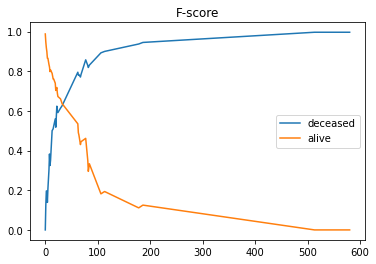

In [17]:
plt.plot(thresholds, np.array(ris['accuracy'])[:,1], label='deceased')
plt.plot(thresholds, np.array(ris['accuracy'])[:,0], label='alive')
plt.legend()
plt.title('F-score')
plt.show()
plt.close()

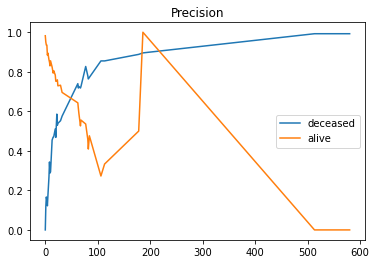

In [18]:
plt.plot(thresholds, np.array(ris['precision'])[:,1], label='deceased')
plt.plot(thresholds, np.array(ris['precision'])[:,0], label='alive')
plt.legend()
plt.title('Precision')
plt.show()
plt.close()

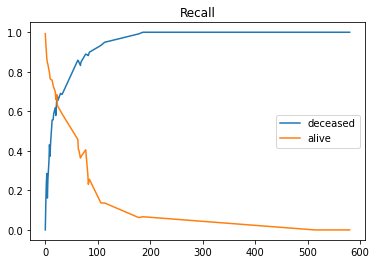

In [19]:
plt.plot(thresholds, np.array(ris['recall'])[:,1], label='deceased')
plt.plot(thresholds, np.array(ris['recall'])[:,0], label='alive')
plt.legend()
plt.title('Recall')
plt.show()
plt.close()

<module 'matplotlib.pyplot' from '/home/fbaldo/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

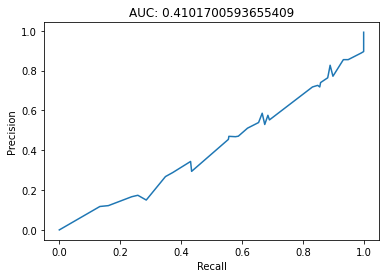

In [20]:
from sklearn import metrics 
df_res = pd.DataFrame({'precision': np.array(ris['precision'])[:,1],
                       'recall': np.array(ris['recall'])[:,1]}, index=thresholds)
df_res = df_res.sort_values(by=['recall'])
plt.plot(df_res.recall, df_res.precision)
plt.title('AUC: ' + str(metrics.auc(df_res.recall, df_res.precision)))
plt.ylabel('Precision')
plt.xlabel('Recall')
plt

[1611 1610  233  217  195  191  164  163  156  153  126  122  121  117
  114  112  109  108  103  101  100   99   86   85   84   83   80   77
   75   71   70   67   65   64   63   61   60   58   57   56   55   54
   48   47   43   42   41   40   38   36   35   34   33   32   30   29
   28   27   26   24   23   22   21   20   19   18   17   16   14   13
   12   11    9    8    7    6    4    3    2    1    0]


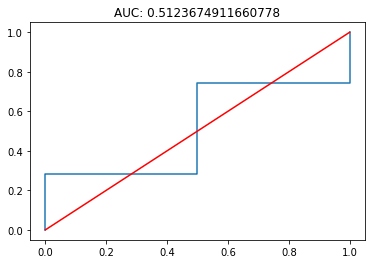